# Libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
from set_extraction_monks import x_train_m1, y_train_m1, x_test_m1, y_test_m1, x_train_m2, y_train_m2, x_test_m2, y_test_m2, x_train_m3, y_train_m3, x_test_m3, y_test_m3

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, data_5 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   124 non-null    int64
 1   a1      124 non-null    int64
 2   a2      124 non-null    int64
 3   a3      124 non-null    int64
 4   a4      124 non-null    int64
 5   a5      124 non-null    int64
 6   a6      124 non-null    int64
dtypes: int64(7)
memory usage: 7.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, data_1 to data_432
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   432 non-null    int64
 1   a1      432 non-null    int64
 2   a2      432 non-null    int64
 3   a3      432 non-null    int64
 4   a4      432 non-null    int64
 5   a5      432 non-null    int64
 6   a6      432 non-null    int64
dtypes: int64(7)
memory usage: 27.0+ KB
Shapes before encoding:
x_train_m1 (124, 6)
y_train_m1 (124,)
x_test_m1 (

# Models

In [3]:
from sklearn.model_selection import KFold

from sklearn.model_selection import GridSearchCV

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from time import time

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
#def MEE(actual, predict):
#   return np.mean(np.linalg.norm(actual - predict, axis=1))
    

In [6]:
results = []

# Neural Networks

## MLPClassifier - monk 1

### Grid search for parameter setting 


In [7]:
params = {  
    'hidden_layer_sizes': [(5,), (5,5,), (5,5,5,), (4,), (4,4,), (4,4,4,), (3,), (3,3,), (3,3,3,), (2,), (2,2,), (2,2,2,)],
    'activation': ['tanh', 'relu'], 
    'solver': ['sgd'],
    'learning_rate_init':  [0.5, 0.7, 0.9], #0.001, 0.01,
    #'learning_rate': ['constant', 'invscaling', 'adaptive'], #added now
    'momentum': [0.5, 0.7, 0.9], #[0.0, 0.01, 0.1], 
    #'alpha': [0], #0.001, 0.01, 0.05, 0.1],
    'n_iter_no_change': [20],
    'tol': [0]
    #'batch_size': [16]
}

In [8]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

start=time()

mlp_search = MLPClassifier(early_stopping=True, random_state=42, max_iter=500, validation_fraction=0.2, nesterovs_momentum=False)

mlp_cv_m1 = GridSearchCV(estimator=mlp_search, param_grid=params, scoring='accuracy', 
                      cv=5, verbose=4, n_jobs=n_jobs_search) 
mlp_cv_m1.fit(x_train_m1, y_train_m1)

print('time for grid search = {:.0f} sec'.format(time()-start))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
time for grid search = 22 sec


In [9]:
mlp_cv_m1.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (4, 4, 4),
 'learning_rate_init': 0.5,
 'momentum': 0.7,
 'n_iter_no_change': 20,
 'solver': 'sgd',
 'tol': 0}

In [10]:
# validation
mlp_cv_m1.best_score_

0.968

In [11]:
best_ep_est = np.argmin(mlp_cv_m1.best_estimator_.loss_curve_)+1

In [12]:
best_ep_est

500

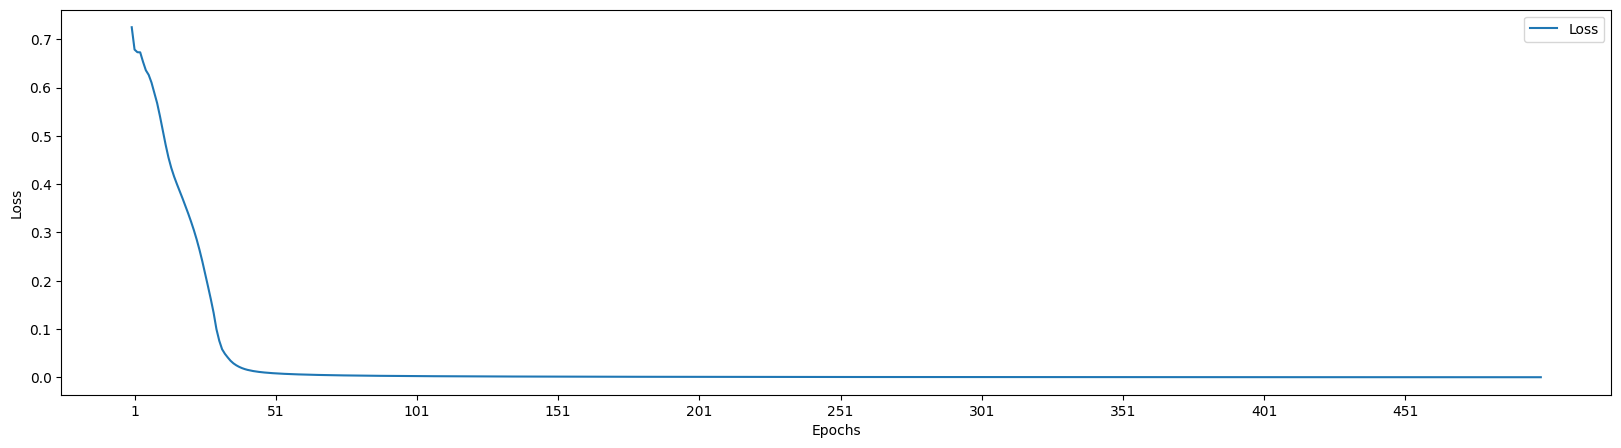

In [13]:
#Loss plot
plt.figure(figsize = (20,5))
plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est]), label='Loss') 
#plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.validation_scores_[0:best_ep_est]), label='accuracy', linestyle='dashed')       
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim([0,5])
plt.xticks(#np.arange(len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])), 
           np.arange(1, len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])+1, 50)) 
           #rotation=90)
plt.legend(loc = 'upper right')

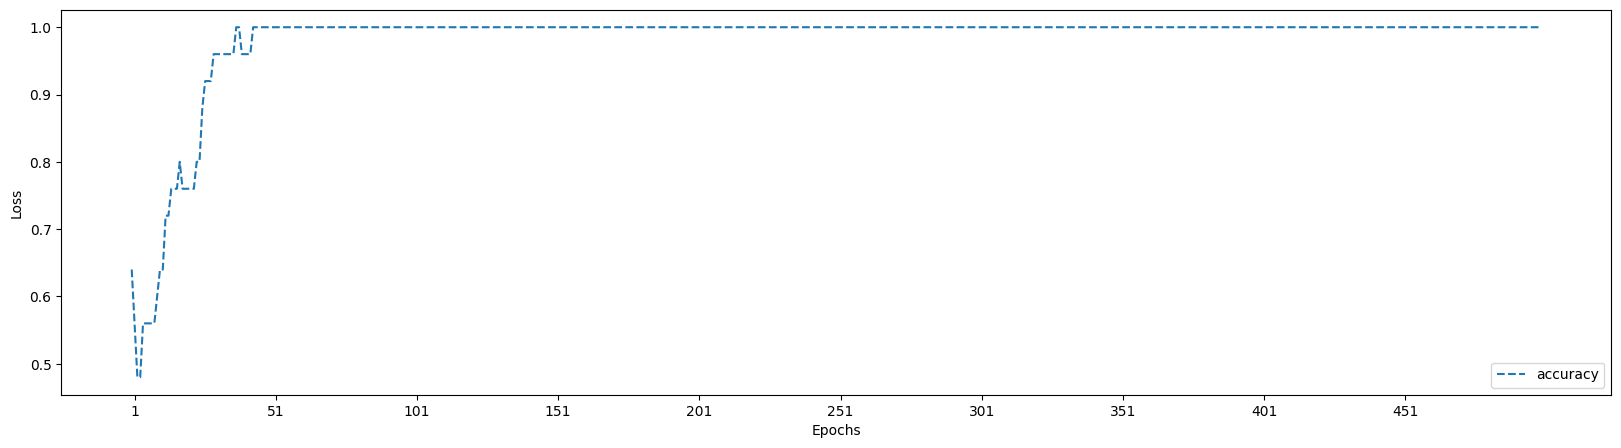

In [14]:
#acc plot
plt.figure(figsize = (20,5))
#plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est]), label='Loss') 
plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.validation_scores_[0:best_ep_est]), label='accuracy', linestyle='dashed')       
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim([0,5])
plt.xticks(#np.arange(len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])), 
           np.arange(1, len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])+1, 50)) 
           #rotation=90)
plt.legend(loc = 'lower right')

In [15]:
mlp_cv_m1.best_estimator_.best_validation_score_

1.0

In [16]:
# save the model to disk
joblib.dump(mlp_cv_m1.best_estimator_, 'monk_models/mlp_m1.z')

['monk_models/mlp_m1.z']

### Final model

In [17]:
mlp = joblib.load('monk_models/mlp_m1.z')

In [18]:
mlp

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.5,
              max_iter=500, momentum=0.7, n_iter_no_change=20,
              nesterovs_momentum=False, random_state=42, solver='sgd', tol=0,
              validation_fraction=0.2)

In [19]:
train_pred_mlp = mlp.predict(x_train_m1)

In [20]:
print('Accuracy train set')
print(classification_report(y_train_m1, train_pred_mlp))

Accuracy train set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62

    accuracy                           1.00       124
   macro avg       1.00      1.00      1.00       124
weighted avg       1.00      1.00      1.00       124



In [21]:
test_pred_mlp = mlp.predict(x_test_m1)

In [22]:
print('Accuarcy test set')
print(classification_report(y_test_m1, test_pred_mlp))

Accuarcy test set
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       216
           1       0.98      1.00      0.99       216

    accuracy                           0.99       432
   macro avg       0.99      0.99      0.99       432
weighted avg       0.99      0.99      0.99       432



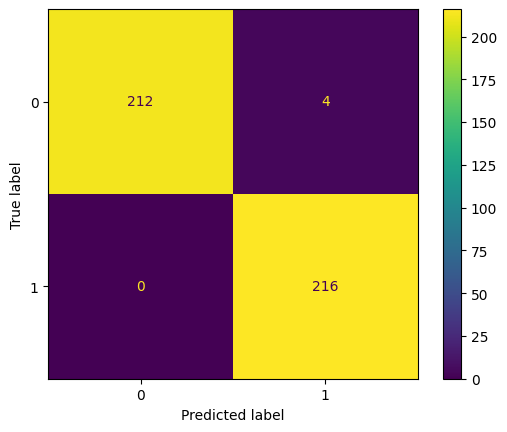

In [23]:
plot_confusion_matrix(mlp, x_test_m1, y_test_m1)
plt.show() 

In [24]:
results.append(('MLPClassifier monk-1 train', accuracy_score(y_train_m1, train_pred_mlp)))
results.append(('MLPClassifier monk-1 validation', mlp_cv_m1.best_score_))
results.append(('MLPClassifier monk-1 test', accuracy_score(y_test_m1, test_pred_mlp)))

## MLPClassifier - monk 2

In [25]:
params = {  
    'hidden_layer_sizes': [(5,), (5,5,), (5,5,5,), (4,), (4,4,), (4,4,4,), (3,), (3,3,), (3,3,3,), (2,), (2,2,), (2,2,2,)],
    'activation': ['tanh', 'relu'], 
    'solver': ['sgd'],
    'learning_rate_init':  [0.5, 0.7, 0.9], #0.001, 0.01,
    #'learning_rate': ['constant', 'invscaling', 'adaptive'], #added now
    'momentum': [0.5, 0.7, 0.9], #[0.0, 0.01, 0.1], 
    #'alpha': [0], #0.001, 0.01, 0.05, 0.1],
    'n_iter_no_change': [20],
    'tol': [0]
    #'batch_size': [16]
}

In [26]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

start=time()

mlp_search = MLPClassifier(early_stopping=True, random_state=42, max_iter=500, validation_fraction=0.2, nesterovs_momentum=False)

mlp_cv_m2 = GridSearchCV(estimator=mlp_search, param_grid=params, scoring='accuracy',#make_scorer(MEE, greater_is_better = False), 
                      cv=5, verbose=4, n_jobs=n_jobs_search) 
mlp_cv_m2.fit(x_train_m2, y_train_m2)

print('time for grid search = {:.0f} sec'.format(time()-start))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
time for grid search = 31 sec


In [27]:
mlp_cv_m2.best_params_

{'activation': 'tanh',
 'hidden_layer_sizes': (4, 4, 4),
 'learning_rate_init': 0.9,
 'momentum': 0.7,
 'n_iter_no_change': 20,
 'solver': 'sgd',
 'tol': 0}

In [28]:
# validation
mlp_cv_m2.best_score_

0.9941176470588236

In [29]:
best_ep_est = np.argmin(mlp_cv_m2.best_estimator_.loss_curve_)+1

In [30]:
best_ep_est

500

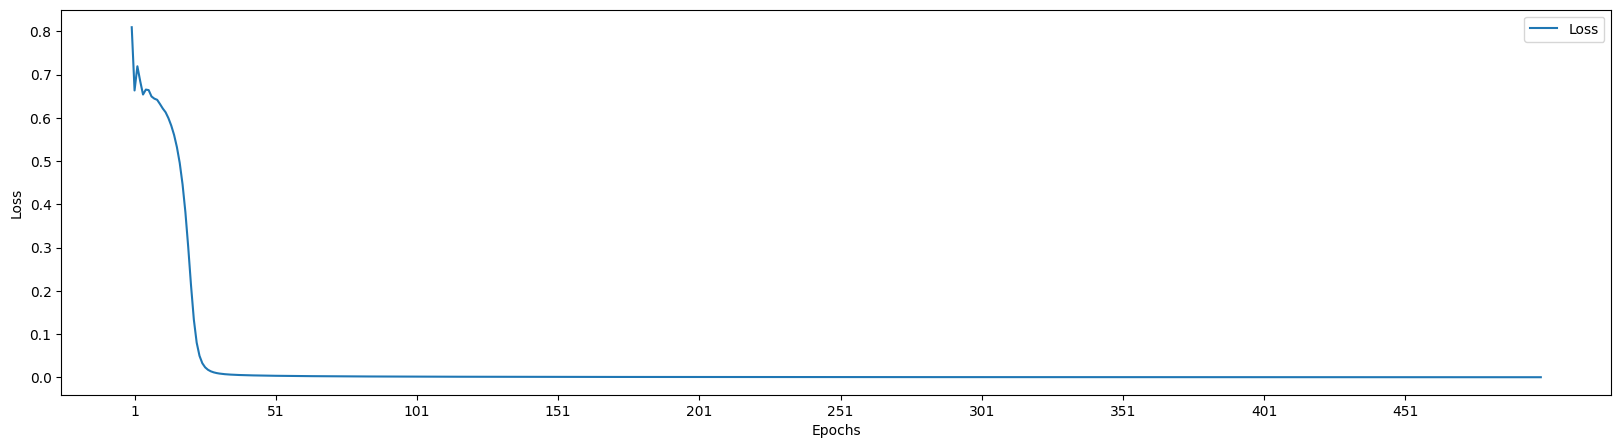

In [31]:
#Loss plot
plt.figure(figsize = (20,5))
plt.plot(pd.DataFrame(mlp_cv_m2.best_estimator_.loss_curve_[0:best_ep_est]), label='Loss') 
#plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.validation_scores_[0:best_ep_est]), label='accuracy', linestyle='dashed')       
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim([0,5])
plt.xticks(#np.arange(len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])), 
           np.arange(1, len(mlp_cv_m2.best_estimator_.loss_curve_[0:best_ep_est])+1, 50)) 
           #rotation=90)
plt.legend(loc = 'upper right')

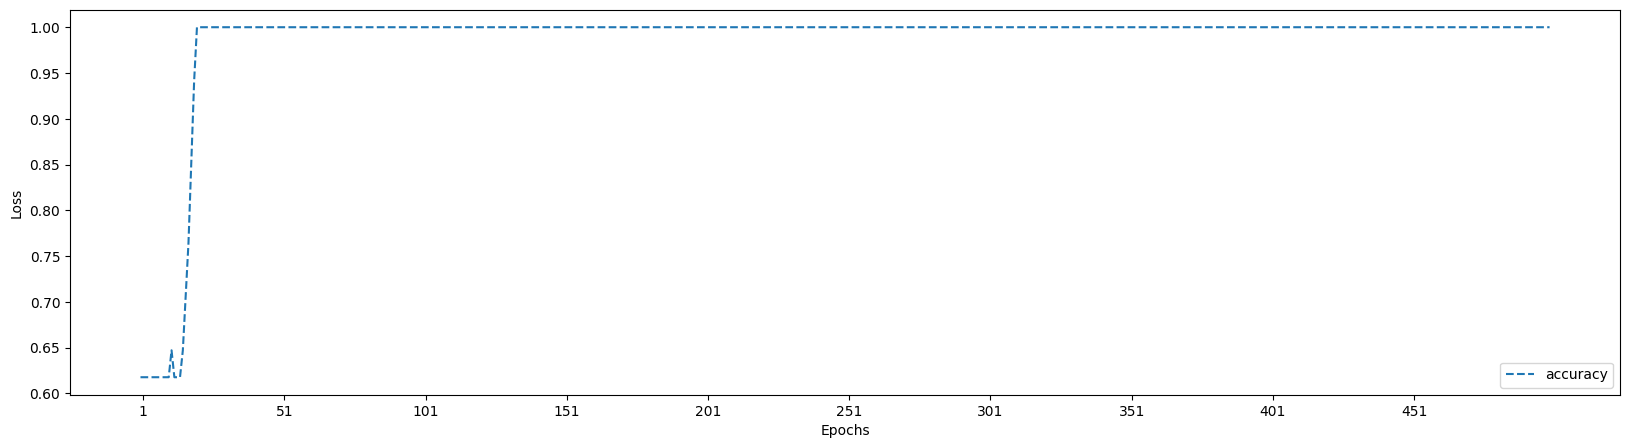

In [32]:
#acc plot
plt.figure(figsize = (20,5))
#plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est]), label='Loss') 
plt.plot(pd.DataFrame(mlp_cv_m2.best_estimator_.validation_scores_[0:best_ep_est]), label='accuracy', linestyle='dashed')       
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim([0,5])
plt.xticks(#np.arange(len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])), 
           np.arange(1, len(mlp_cv_m2.best_estimator_.loss_curve_[0:best_ep_est])+1, 50)) 
           #rotation=90)
plt.legend(loc = 'lower right')

In [33]:
# save the model to disk
joblib.dump(mlp_cv_m2.best_estimator_, 'monk_models/mlp_m2.z')

['monk_models/mlp_m2.z']

### Final model

In [34]:
mlp = joblib.load('monk_models/mlp_m2.z')

In [35]:
mlp

MLPClassifier(activation='tanh', early_stopping=True,
              hidden_layer_sizes=(4, 4, 4), learning_rate_init=0.9,
              max_iter=500, momentum=0.7, n_iter_no_change=20,
              nesterovs_momentum=False, random_state=42, solver='sgd', tol=0,
              validation_fraction=0.2)

In [36]:
train_pred_mlp = mlp.predict(x_train_m2)

In [37]:
print('Accuracy train set')
print(classification_report(y_train_m2, train_pred_mlp))

Accuracy train set
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       105
           1       0.98      1.00      0.99        64

    accuracy                           0.99       169
   macro avg       0.99      1.00      0.99       169
weighted avg       0.99      0.99      0.99       169



In [38]:
test_pred_mlp = mlp.predict(x_test_m2)

In [39]:
print('Accuarcy test set')
print(classification_report(y_test_m2, test_pred_mlp))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       290
           1       0.91      0.99      0.95       142

    accuracy                           0.96       432
   macro avg       0.95      0.97      0.96       432
weighted avg       0.97      0.96      0.96       432



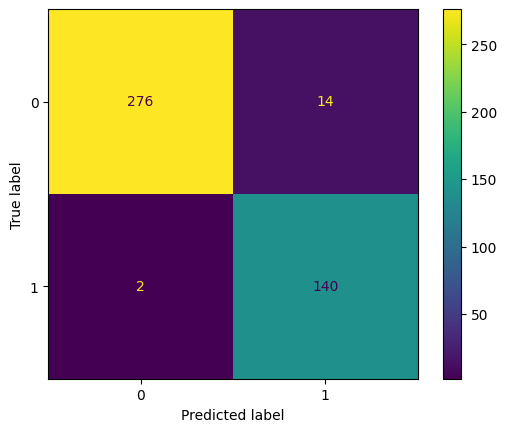

In [40]:
plot_confusion_matrix(mlp, x_test_m2, y_test_m2)
plt.show() 

In [41]:
results.append(('MLPClassifier monk-2 train', accuracy_score(y_train_m2, train_pred_mlp)))
results.append(('MLPClassifier monk-2 validation', mlp_cv_m2.best_score_))
results.append(('MLPClassifier monk-2 test', accuracy_score(y_test_m2, test_pred_mlp)))

## MLPClassifier - monk 3

In [42]:
params = {  
    'hidden_layer_sizes': [(5,), (5,5,), (5,5,5,), (4,), (4,4,), (4,4,4,), (3,), (3,3,), (3,3,3,), (2,), (2,2,), (2,2,2,)],
    'activation': ['tanh', 'relu'], 
    'solver': ['sgd'],
    'learning_rate_init':  [0.1, 0.3, 0.5, 0.7, 0.9], #0.001, 0.01,
    #'learning_rate': ['constant', 'invscaling', 'adaptive'], #added now
    'momentum': [0.1, 0.3, 0.5, 0.7, 0.9], #[0.0, 0.01, 0.1], 
    'alpha': [0.001, 0.01, 0.1],
    'n_iter_no_change': [20],
    'tol': [0]
    #'batch_size': [16]
}

In [43]:
#hyperparameter tuning with grid search CV
n_jobs_search = -1

start=time()

mlp_search = MLPClassifier(early_stopping=True, random_state=42, max_iter=500, validation_fraction=0.2, nesterovs_momentum=False)

mlp_cv_m3 = GridSearchCV(estimator=mlp_search, param_grid=params, scoring='accuracy',#make_scorer(MEE, greater_is_better = False), 
                      cv=5, verbose=4, n_jobs=n_jobs_search) 
mlp_cv_m3.fit(x_train_m3, y_train_m3)

print('time for grid search = {:.0f} sec'.format(time()-start))

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
time for grid search = 255 sec


In [44]:
mlp_cv_m3.best_params_

{'activation': 'relu',
 'alpha': 0.1,
 'hidden_layer_sizes': (2,),
 'learning_rate_init': 0.7,
 'momentum': 0.9,
 'n_iter_no_change': 20,
 'solver': 'sgd',
 'tol': 0}

In [45]:
# validation
mlp_cv_m3.best_score_

0.9423333333333334

In [46]:
best_ep_est = np.argmin(mlp_cv_m3.best_estimator_.loss_curve_)+1

In [47]:
best_ep_est

64

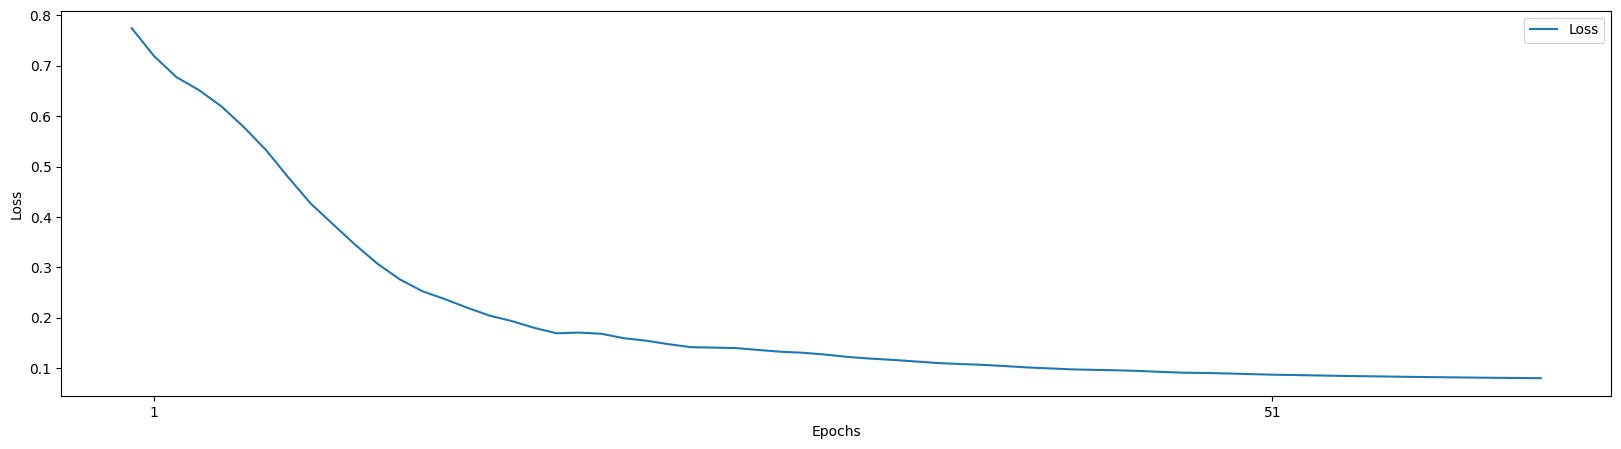

In [48]:
#Loss plot
plt.figure(figsize = (20,5))
plt.plot(pd.DataFrame(mlp_cv_m3.best_estimator_.loss_curve_[0:best_ep_est]), label='Loss') 
#plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.validation_scores_[0:best_ep_est]), label='accuracy', linestyle='dashed')       
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim([0,5])
plt.xticks(#np.arange(len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])), 
           np.arange(1, len(mlp_cv_m3.best_estimator_.loss_curve_[0:best_ep_est])+1, 50)) 
           #rotation=90)
plt.legend(loc = 'upper right')

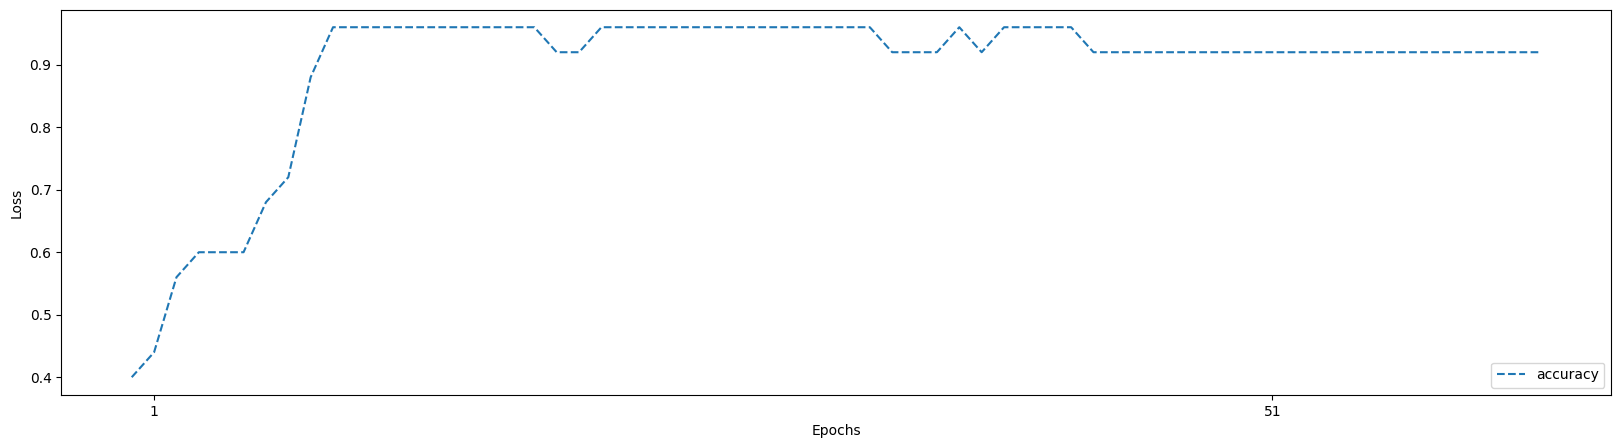

In [49]:
#acc plot
plt.figure(figsize = (20,5))
#plt.plot(pd.DataFrame(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est]), label='Loss') 
plt.plot(pd.DataFrame(mlp_cv_m3.best_estimator_.validation_scores_[0:best_ep_est]), label='accuracy', linestyle='dashed')       
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim([0,5])
plt.xticks(#np.arange(len(mlp_cv_m1.best_estimator_.loss_curve_[0:best_ep_est])), 
           np.arange(1, len(mlp_cv_m3.best_estimator_.loss_curve_[0:best_ep_est])+1, 50)) 
           #rotation=90)
plt.legend(loc = 'lower right')

In [50]:
# save the model to disk
joblib.dump(mlp_cv_m3.best_estimator_, 'monk_models/mlp_m3.z')

['monk_models/mlp_m3.z']

### Final model

In [51]:
mlp = joblib.load('monk_models/mlp_m3.z')

In [52]:
mlp

MLPClassifier(alpha=0.1, early_stopping=True, hidden_layer_sizes=(2,),
              learning_rate_init=0.7, max_iter=500, n_iter_no_change=20,
              nesterovs_momentum=False, random_state=42, solver='sgd', tol=0,
              validation_fraction=0.2)

In [53]:
train_pred_mlp = mlp.predict(x_train_m3)

In [54]:
print('Accuracy train set')
print(classification_report(y_train_m3, train_pred_mlp))

Accuracy train set
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.93      0.95      0.94        60

    accuracy                           0.94       122
   macro avg       0.94      0.94      0.94       122
weighted avg       0.94      0.94      0.94       122



In [55]:
test_pred_mlp = mlp.predict(x_test_m3)

In [56]:
print('Accuarcy test set')
print(classification_report(y_test_m3, test_pred_mlp))

Accuarcy test set
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       204
           1       1.00      0.89      0.94       228

    accuracy                           0.94       432
   macro avg       0.94      0.94      0.94       432
weighted avg       0.95      0.94      0.94       432



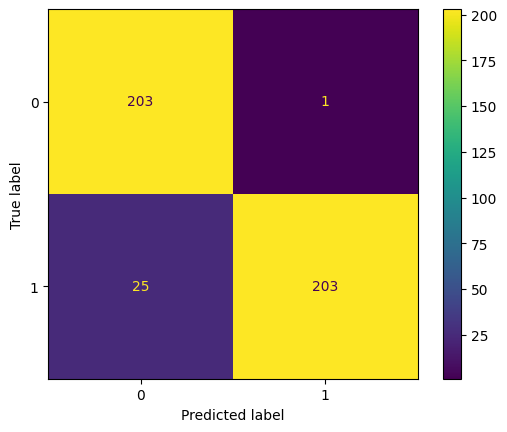

In [57]:
plot_confusion_matrix(mlp, x_test_m3, y_test_m3)
plt.show() 

In [58]:
results.append(('MLPClassifier monk-3 train', accuracy_score(y_train_m3, train_pred_mlp)))
results.append(('MLPClassifier monk-3 validation', mlp_cv_m3.best_score_))
results.append(('MLPClassifier monk-3 test', accuracy_score(y_test_m3, test_pred_mlp)))

# Summary

In [59]:
for i in range(len(results)):
  print(results[i])

('MLPClassifier monk-1 train', 1.0)
('MLPClassifier monk-1 validation', 0.968)
('MLPClassifier monk-1 test', 0.9907407407407407)
('MLPClassifier monk-2 train', 0.9940828402366864)
('MLPClassifier monk-2 validation', 0.9941176470588236)
('MLPClassifier monk-2 test', 0.9629629629629629)
('MLPClassifier monk-3 train', 0.9426229508196722)
('MLPClassifier monk-3 validation', 0.9423333333333334)
('MLPClassifier monk-3 test', 0.9398148148148148)
